lab3_nlp0 
for comments read https://github.com/SylGrafe/RepoDl01/lab3/lab3sygr0003.pdf



How to fix 'Object arrays cannot be loaded when allow_pickle=False' for imdb.load_data() function?
Ask Question

https://stackoverflow.com/questions/55890813/how-to-fix-object-arrays-cannot-be-loaded-when-allow-pickle-false-for-imdb-loa

In [0]:
# try to fix bug object arrya ...  with this import
!pip install numpy==1.16.1
import numpy as np

     |████████████████████████████████| 17.3MB 3.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3


load reviews with max  (num_words=10000)
nb of reviews    train=25000  , test=25000 
  input_train.dtype: object , shapes : input_train :(25000,) , input_test:(25000,) :
 len(input_train[0]=218  input_train[0][-10:]   [4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 
Pad sequences to 500 words 
 after padding , shapes  input_train :(25000, 500) , input_test:(25000, 500) :

train model0 : Embedd (maxFeat , 32 ) + RNN(32)  
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.6493 - acc: 0.6057 - val_loss: 0.5884 - val_acc: 0.7178
Epoch 2/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.4226 - acc: 0.8208 - val_loss: 0.4540 - val_acc: 0.7876
Epoch 3/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.3183 - acc: 0.8693 - val_loss: 0.3998 - val_acc: 0.8166
Epoch 4/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.2406 - acc: 0.9058 - val_loss: 0.3

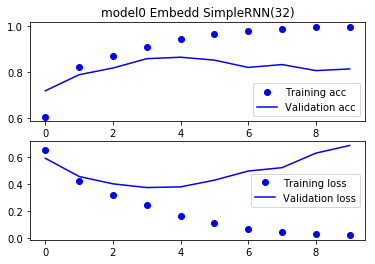


lab3_nlp0 train model1 : Embedd (maxFeat , 32 ) + LSTM(32)  
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 105s 5ms/step - loss: 0.5045 - acc: 0.7648 - val_loss: 0.4358 - val_acc: 0.7998
Epoch 2/10
20000/20000 [==============================] - 104s 5ms/step - loss: 0.2905 - acc: 0.8843 - val_loss: 0.3544 - val_acc: 0.8458
Epoch 3/10
20000/20000 [==============================] - 105s 5ms/step - loss: 0.2291 - acc: 0.9123 - val_loss: 0.2910 - val_acc: 0.8856
Epoch 4/10
20000/20000 [==============================] - 103s 5ms/step - loss: 0.1940 - acc: 0.9297 - val_loss: 0.3247 - val_acc: 0.8548
Epoch 5/10
20000/20000 [==============================] - 106s 5ms/step - loss: 0.1757 - acc: 0.9366 - val_loss: 0.3108 - val_acc: 0.8662
Epoch 6/10
20000/20000 [==============================] - 105s 5ms/step - loss: 0.1524 - acc: 0.9443 - val_loss: 0.5278 - val_acc: 0.8534
Epoch 7/10
20000/20000 [==============================] - 103

<Figure size 432x288 with 0 Axes>

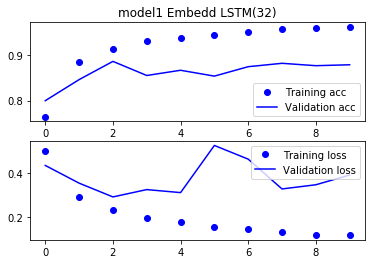

<Figure size 432x288 with 0 Axes>

In [0]:
#!/usr/bin/env python
# sygr0003 , UMU54907 , VT2019 , lab3_nlp0 , simple nlp (natural language processing)
# from 6.2-understanding-recurrent-neural-networks.py 

import keras
keras.__version__

# # Understanding recurrent neural networks
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import LSTM

import matplotlib.pyplot as plt
import sys


max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32
myEpochs=10


"""
# TODO TODO   TEST ONLY TO BE REMOVE ---  START 
myEpochs=1
max_features = 10000  # number of words to consider as features
maxlen=20
# TODO TODO   TEST ONLY TO BE REMOVE ---END
"""


################################## funct
def plotTraining (theHist , theTitle='training curves'):

  plt.figure()
  ax = plt.subplot(2, 1, 1)
  ax.set_title(theTitle)
  acc = theHist.history['acc']
  val_acc = theHist.history['val_acc']
  loss = theHist.history['loss']
  val_loss = theHist.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.legend()

  ax = plt.subplot(2, 1, 2)
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.legend()

  plt.show(block=False)
  plt.savefig(theTitle)


################################## main
print('load reviews with max  (num_words=%d)' % (max_features) )
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print( 'nb of reviews    train=%d  , test=%d '  %   (len(input_train ) ,len(input_test) ))

someNb=-10
print('  input_train.dtype: %s , shapes : input_train :%s , input_test:%s :' % (
            (input_train.dtype ) , ( input_train.shape) ,( input_test.shape) ))

print (' len(input_train[0]=%d  input_train[0][%d:]   %s ' % 
       (len(input_train[0]) , someNb , input_train[0][someNb:]))


print('Pad sequences to %d words ' % (maxlen))
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print(' after padding , shapes  input_train :%s , input_test:%s :' % (
           ( input_train.shape) ,( input_test.shape) ))
# print (' after padding input_train[0][%d:]   %s ' % (someNb , input_train[0][someNb:]))


############### model0  Embedding and Simple RNN 

print ("\ntrain model0 : Embedd (maxFeat , 32 ) + RNN(32)  ")

model0 = Sequential()
model0.add(Embedding(max_features, 32))
model0.add(SimpleRNN(32))
model0.add(Dense(1, activation='sigmoid'))

model0.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist0 = model0.fit(input_train, y_train,
                    epochs=myEpochs,
                    batch_size=128,
                    verbose=1 ,
                    validation_split=0.2)



# Let's display the training and validation loss and accuracy:
theTitle ="model0 Embedd SimpleRNN(32)"
plotTraining(hist0 , theTitle)

# As a reminder, in chapter 3, our very first naive approach to this very dataset got us to 88% test accuracy. Unfortunately, our small  # recurrent network doesn't perform very well at all compared to this baseline (only up to 85% validation accuracy). Part of the problem is 
# that our inputs only consider the first 500 words rather the full sequences -- 
# hence our RNN has access to less information than our earlier baseline model. The remainder of the problem is simply that `SimpleRNN` isn't very good at processing long sequences, like text. Other types of recurrent layers perform much better. Let's take a look at some 
# more advanced layers.

# ## A concrete LSTM example in Keras
# 
# Now let's switch to more practical concerns: we will set up a model using a LSTM layer and train it on the IMDB data. Here's the network, 
# similar to the one with `SimpleRNN` that we just presented. We only specify the output dimensionality of the LSTM layer, and leave every 
# other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without you 
# having to spend time tuning parameters by hand.


############### model1  Embedding and lstm

model1 = Sequential()
model1.add(Embedding(max_features, 32))
model1.add(LSTM(32))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

print ("\nlab3_nlp0 train model1 : Embedd (maxFeat , 32 ) + LSTM(32)  ")
hist1 = model1.fit(input_train, y_train,
                    epochs=myEpochs,
                    batch_size=128,
                   verbose=1 ,
                    validation_split=0.2)

theTitle ="model1 Embedd LSTM(32)"
plotTraining( hist1 , theTitle)


train model00  Dense(16) , Dense(16),  Dense(1) )
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
 - 2s - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
 - 2s - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
 - 2s - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
 - 2s - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
 - 2s - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
 - 2s - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_acc: 0.8846
Epoch 8/20
 - 2s - loss: 0.0807 - acc: 0.9763 - val_loss: 0.3859 - val_acc: 0.8649
Epoch 9/20
 - 2s - loss: 0.0661 - acc: 0.9821 - val_loss: 0.3635 - val_acc: 0.8782
Epoch 10/20
 - 2s - loss: 0.0561 - acc: 0.9853 - val_loss: 0.3842 - val_acc: 0.8792
Epoch 11/20
 - 2s - loss: 0.0439 - acc: 0.9893 - val_loss: 0.4153 - v

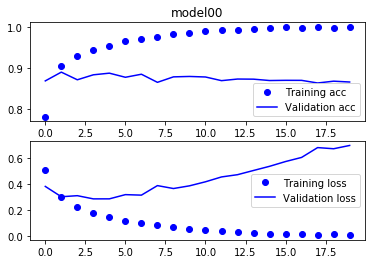

<Figure size 432x288 with 0 Axes>

In [0]:
# try to fix bug object arrya ...  with this import
!pip install numpy==1.16.1
import numpy as np
from keras import optimizers
from keras import losses
from keras import metrics




############# model00 as a reference ,  dense only
# see cholet # extracted from 3.5-classifying-movie-reviews.py 

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

x00_train = vectorize_sequences(train_data)
x00_test = vectorize_sequences(test_data)
y00_train = np.asarray(train_labels).astype('float32')
y00_test = np.asarray(test_labels).astype('float32')

model00 = Sequential()
model00.add(Dense(16, activation='relu', input_shape=(10000,)))
model00.add(Dense(16, activation='relu'))
model00.add(Dense(1, activation='sigmoid'))

model00.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=['acc'])

x00_val = x00_train[:10000]
partial_x00_train = x00_train[10000:]
y00_val = y00_train[:10000]
partial_y00_train = y00_train[10000:]


print ("train model00  Dense(16) , Dense(16),  Dense(1) )")                    


hist00 = model00.fit(partial_x00_train,
                    partial_y00_train,
                    epochs=20,
                    verbose=2,
                    batch_size=512,
                    validation_data=(x00_val, y00_val))
theTitle ="model00"
plotTraining( hist00 , theTitle)


In [0]:
from google.colab  import files
files.download ('model00')





FileNotFoundError: ignored

end notebook
